
# Gradient Boosting Machines (GBM) with Hyperparameter Tuning

This notebook provides an overview of Gradient Boosting Machines (GBM), including implementation on multiple datasets and hyperparameter tuning.



## Background

Gradient Boosting Machines (GBM) are powerful ensemble learning algorithms used for both classification and regression tasks. They build models in a stage-wise manner and combine weak learners (typically decision trees) to form a strong predictor. GBM is particularly known for its performance in various machine learning competitions and real-world applications.

### How GBM Works

GBM works by sequentially adding models that correct the errors made by the previous models. The key idea is to minimize a loss function by adding weak learners that point in the negative gradient direction of the loss function.

### Hyperparameters

- **n_estimators**: The number of boosting stages to be run.
- **learning_rate**: Shrinks the contribution of each tree by learning_rate.
- **max_depth**: The maximum depth of the individual regression estimators.



## Implementation in Python

We'll implement GBM using Scikit-Learn on multiple datasets and demonstrate hyperparameter tuning.


Results for Iris Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



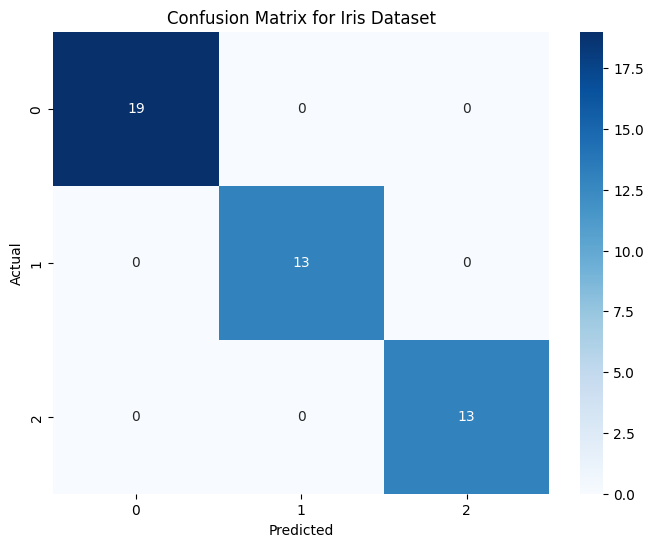

Results for Wine Dataset:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.90      0.90      0.90        21
           2       1.00      0.79      0.88        14

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



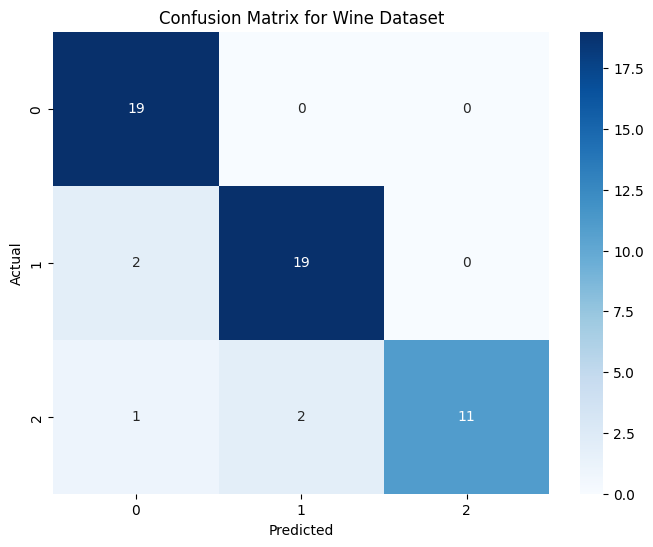

Results for Digits Dataset:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.97      0.97        60
           5       0.98      0.97      0.98        66
           6       0.98      0.96      0.97        53
           7       0.95      0.98      0.96        55
           8       0.88      1.00      0.93        43
           9       0.96      0.93      0.95        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



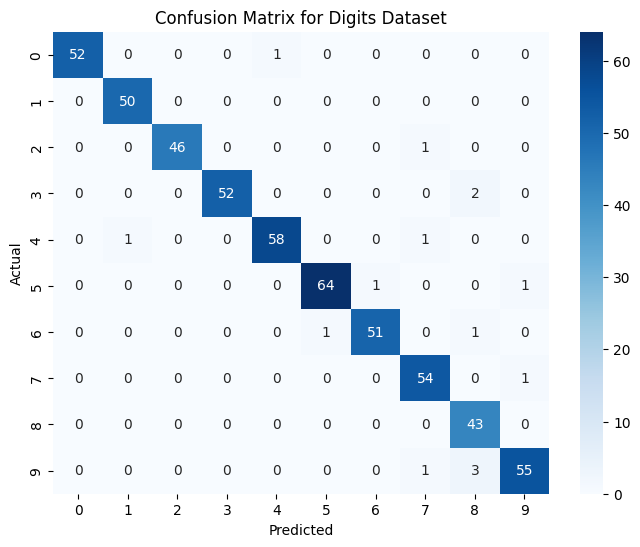

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Load datasets
iris = datasets.load_iris()
wine = datasets.load_wine()
digits = datasets.load_digits()

datasets_list = [(iris, "Iris"), (wine, "Wine"), (digits, "Digits")]

for dataset, name in datasets_list:
    X = dataset.data
    y = dataset.target

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the Gradient Boosting model
    model = GradientBoostingClassifier()

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Results for {name} Dataset:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, f"Confusion Matrix for {name} Dataset")



## Hyperparameter Tuning

We'll perform hyperparameter tuning using GridSearchCV to find the best values for `n_estimators`, `learning_rate`, and `max_depth`.


In [ ]:

# Perform GridSearchCV on the Iris dataset
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit=True, verbose=2)
grid.fit(iris.data, iris.target)

# Print the best parameters and estimator
print("Best Parameters for Iris Dataset:", grid.best_params_)
print("Best Estimator for Iris Dataset:", grid.best_estimator_)

# Evaluate the tuned model
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix for the tuned model
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix for Tuned Model on Iris Dataset")


## Conclusion

In this notebook, we've explored Gradient Boosting Machines (GBM), covering its background, mathematical foundation, implementation on multiple datasets, and hyperparameter tuning. GBM is a robust and powerful algorithm suitable for a wide range of classification and regression tasks.
